# Week 2 - Linear Regression with Multiple Variables

In [454]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import math
from PIL import Image

In [455]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Read Data

In [456]:
data = pd.read_csv("ex1data1.txt", header=None)

In [457]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [458]:
def init_data(data):
    X, y = data[0], data[1]
    m = len(y)

    # Add ones for the intercept
    X = np.column_stack((np.ones(m), data[0]))
    theta = np.zeros((2, 1))[:, 0]
    iterations = 1000
    alpha = 0.01
    
    return X, y, m, theta, iterations, alpha

In [459]:
X, y, m, theta, iterations, alpha = init_data(data)

In [460]:
theta

array([0., 0.])

In [461]:
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [462]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64

In [463]:
def plot_data(X_val, y_val):
    plt.scatter(X_val, y_val, marker="x", c="red", alpha=0.6)
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")


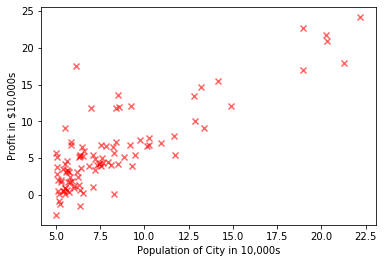

In [464]:
plot_data(X[:, 1], y)
plt.show()

## Formulas

In [465]:
def read_image(file, size=(5.5, 5.5)):
    img = mpimg.imread(file)
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.show()


Cost Function:

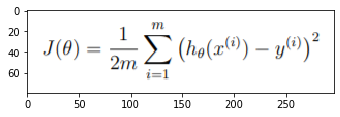

In [466]:
read_image("cost function.PNG")

Hypothesis (linear model):

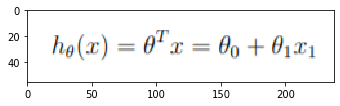

In [467]:
read_image("hypothesis linear function.PNG")

Updating coefficients

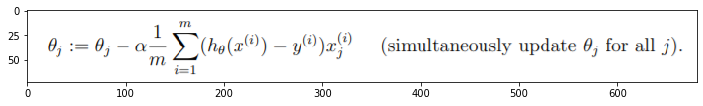

In [468]:
read_image("update theta.PNG", (12, 12))

## Cost Function

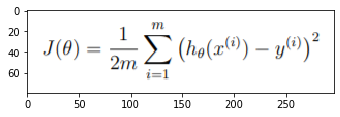

In [469]:
read_image("cost function.PNG")

In [470]:
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [471]:
# Calculate cost
def calculate_cost(X, y, theta):
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    
    return J

In [472]:
calculate_cost(X, y, theta)

32.072733877455676

In [473]:
print(theta)

[0. 0.]


In [474]:
X[:, 1]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [475]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64

[0. 0.]


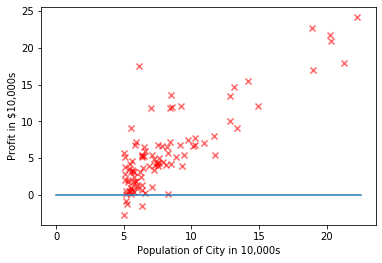

In [476]:
def plot_estimate(X, y, theta):
    print(theta)
    plot_data(X, y)
    p1 = (0, theta[0])
    p2 = (22.5, theta[0] + theta[1] * 22.5)
    points = list(zip(p1, p2))
    plt.plot(points[0], points[1])
    
plot_estimate(X[:, 1], y, theta)
plt.show()

## Gradient Descent

In [477]:
X, y, m, theta, iterations, alpha = init_data(data)

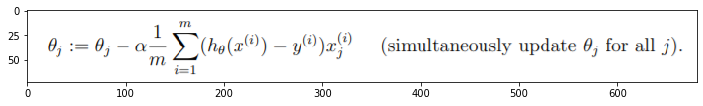

In [478]:
read_image("update theta.PNG", (12, 12))

In [479]:
calculate_cost(X, y, theta)

32.072733877455676

In [480]:
def gradient_descent(X, y, theta, m):
    h = X.dot(theta)
    loss = h - y
    gradient = (1 / m) * X.T.dot(loss)

    new_theta = theta - alpha * gradient

#     print("Alpha:", alpha)
#     print("Gradient:", gradient)
#     print("Old Theta:", theta)
    print("New Theta:", new_theta)
#     print("Old Cost:", calculate_cost(X, y, theta))
    print("New Cost:", calculate_cost(X, y, new_theta))
    
    return new_theta

In [481]:
for i in range(iterations):
    theta = gradient_descent(X, y, theta, m)

New Theta: [0.05839135 0.6532885 ]
New Cost: 6.737190464870006
New Theta: [0.06289175 0.77000978]
New Cost: 5.931593568604956
New Theta: [0.05782293 0.79134812]
New Cost: 5.901154707081388
New Theta: [0.05106363 0.79572981]
New Cost: 5.895228586444221
New Theta: [0.04401438 0.79709618]
New Cost: 5.89009494311733
New Theta: [0.03692413 0.79792547]
New Cost: 5.885004158443647
New Theta: [0.02983712 0.79865824]
New Cost: 5.879932480491418
New Theta: [0.02276118 0.79937279]
New Cost: 5.874879094762575
New Theta: [0.0156977  0.80008305]
New Cost: 5.869843911806386
New Theta: [0.0086469 0.8007915]
New Cost: 5.86482686531293
New Theta: [0.00160879 0.80149857]
New Cost: 5.859827889932181
New Theta: [-0.00541662  0.80220436]
New Cost: 5.85484692057229
New Theta: [-0.01242938  0.80290886]
New Cost: 5.849883892376588
New Theta: [-0.01942949  0.8036121 ]
New Cost: 5.844938740722034
New Theta: [-0.02641699  0.80431407]
New Cost: 5.840011401218361
New Theta: [-0.03339189  0.80501478]
New Cost: 5.835

New Cost: 5.176152962891966
New Theta: [-1.12949731  0.91513045]
New Cost: 5.173634551165022
New Theta: [-1.1344838  0.9156314]
New Cost: 5.171125210611782
New Theta: [-1.1394613   0.91613145]
New Cost: 5.168624908558403
New Theta: [-1.14442983  0.91663059]
New Cost: 5.166133612448731
New Theta: [-1.14938941  0.91712883]
New Cost: 5.163651289843875
New Theta: [-1.15434004  0.91762618]
New Cost: 5.16117790842179
New Theta: [-1.15928175  0.91812262]
New Cost: 5.15871343597685
New Theta: [-1.16421455  0.91861818]
New Cost: 5.156257840419434
New Theta: [-1.16913846  0.91911284]
New Cost: 5.1538110897755045
New Theta: [-1.17405349  0.91960661]
New Cost: 5.151373152186197
New Theta: [-1.17895967  0.92009948]
New Cost: 5.148943995907396
New Theta: [-1.183857    0.92059147]
New Cost: 5.146523589309322
New Theta: [-1.1887455   0.92108258]
New Cost: 5.144111900876139
New Theta: [-1.19362519  0.9215728 ]
New Cost: 5.141708899205515
New Theta: [-1.19849609  0.92206213]
New Cost: 5.139314553008234


New Theta: [-1.9109617   0.99363703]
New Cost: 4.835621806212003
New Theta: [-1.91453952  0.99399646]
New Cost: 4.834329968059677
New Theta: [-1.9181109   0.99435524]
New Cost: 4.833042783033826
New Theta: [-1.92167584  0.99471338]
New Cost: 4.831760234374157
New Theta: [-1.92523436  0.99507087]
New Cost: 4.830482305380745
New Theta: [-1.92878645  0.99542772]
New Cost: 4.829208979413817
New Theta: [-1.93233215  0.99578392]
New Cost: 4.827940239893541
New Theta: [-1.93587145  0.99613948]
New Cost: 4.826676070299799
New Theta: [-1.93940438  0.9964944 ]
New Cost: 4.825416454171979
New Theta: [-1.94293094  0.99684869]
New Cost: 4.824161375108761
New Theta: [-1.94645113  0.99720233]
New Cost: 4.822910816767898
New Theta: [-1.94996499  0.99755533]
New Cost: 4.821664762866011
New Theta: [-1.95347251  0.9979077 ]
New Cost: 4.8204231971783695
New Theta: [-1.9569737   0.99825943]
New Cost: 4.819186103538688
New Theta: [-1.96046859  0.99861053]
New Cost: 4.817953465838902
New Theta: [-1.96395718 

New Cost: 4.668393060867689
New Theta: [-2.44835187  1.0476237 ]
New Cost: 4.667703571005477
New Theta: [-2.450961    1.04788582]
New Cost: 4.667016564645957
New Theta: [-2.45356542  1.04814746]
New Cost: 4.666332032843698
New Theta: [-2.45616515  1.04840863]
New Cost: 4.665649966685489
New Theta: [-2.4587602   1.04866933]
New Cost: 4.664970357290219
New Theta: [-2.46135057  1.04892956]
New Cost: 4.664293195808771
New Theta: [-2.46393626  1.04918932]
New Cost: 4.6636184734239015
New Theta: [-2.4665173   1.04944861]
New Cost: 4.662946181350124
New Theta: [-2.46909369  1.04970744]
New Cost: 4.662276310833599
New Theta: [-2.47166543  1.0499658 ]
New Cost: 4.661608853152018
New Theta: [-2.47423253  1.05022369]
New Cost: 4.660943799614486
New Theta: [-2.47679501  1.05048112]
New Cost: 4.660281141561418
New Theta: [-2.47935287  1.05073809]
New Cost: 4.659620870364415
New Theta: [-2.48190611  1.05099459]
New Cost: 4.65896297742616
New Theta: [-2.48445476  1.05125063]
New Cost: 4.6583074541803

New Theta: [-2.87212729  1.09019654]
New Cost: 4.572368544906734
New Theta: [-2.87397252  1.09038191]
New Cost: 4.572024929809526
New Theta: [-2.87581443  1.09056695]
New Cost: 4.571682552394068
New Theta: [-2.87765302  1.09075166]
New Cost: 4.5713414082023025
New Theta: [-2.87948829  1.09093603]
New Cost: 4.571001492792229
New Theta: [-2.88132026  1.09112007]
New Cost: 4.5706628017378454
New Theta: [-2.88314892  1.09130378]
New Cost: 4.570325330629094
New Theta: [-2.88497428  1.09148716]
New Cost: 4.569989075071803
New Theta: [-2.88679636  1.09167021]
New Cost: 4.569654030687623
New Theta: [-2.88861515  1.09185292]
New Cost: 4.56932019311398
New Theta: [-2.89043066  1.09203531]
New Cost: 4.568987558004012
New Theta: [-2.8922429   1.09221737]
New Cost: 4.568656121026514
New Theta: [-2.89405188  1.0923991 ]
New Cost: 4.568325877865882
New Theta: [-2.89585759  1.0925805 ]
New Cost: 4.567996824222056
New Theta: [-2.89766005  1.09276158]
New Cost: 4.567668955810466
New Theta: [-2.89945926 

New Cost: 4.527157858059903
New Theta: [-3.1546497   1.11857898]
New Cost: 4.52697708924765
New Theta: [-3.15598566  1.11871319]
New Cost: 4.526796971554226
New Theta: [-3.15731921  1.11884716]
New Cost: 4.52661750263434
New Theta: [-3.15865036  1.11898089]
New Cost: 4.526438680151146
New Theta: [-3.15997911  1.11911438]
New Cost: 4.526260501776218
New Theta: [-3.16130546  1.11924762]
New Cost: 4.526082965189512
New Theta: [-3.16262942  1.11938063]
New Cost: 4.5259060680793475
New Theta: [-3.163951    1.11951339]
New Cost: 4.525729808142365
New Theta: [-3.16527019  1.11964592]
New Cost: 4.525554183083503
New Theta: [-3.16658701  1.11977821]
New Cost: 4.5253791906159675
New Theta: [-3.16790145  1.11991026]
New Cost: 4.525204828461203
New Theta: [-3.16921352  1.12004207]
New Cost: 4.525031094348856
New Theta: [-3.17052323  1.12017365]
New Cost: 4.524857986016757
New Theta: [-3.17183058  1.12030498]
New Cost: 4.524685501210879
New Theta: [-3.17313557  1.12043608]
New Cost: 4.5245136376853

In [482]:
theta

array([-3.24140214,  1.1272942 ])

[-3.24140214  1.1272942 ]


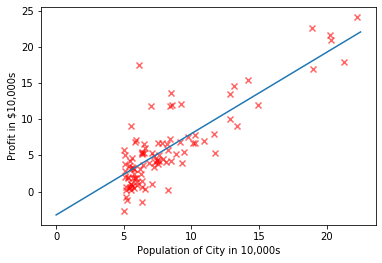

In [483]:
plot_estimate(X[:, 1], y, theta)
plt.show()